#I. Background

Nowadays, analyzing app download and rating data has indeed become a crucial tool for app developers to succeed in the highly competitive mobile app market. Understanding user preferences, behavior, and feedback can provide valuable insights for improving app performance, enhancing user experience, and ultimately increasing user acquisition and retention.<br>


# II. Dataset Description

(Sourced from: [HeyWhale](https://www.heywhale.com/mw/dataset/5f2bd572af3980002cb2929f/content))<br>


* "id": Apple-provided unique ID for each app.
* "track_name": Name of the app.
* "size_bytes": App size in bytes.
* "price": Price of the app in USD.
* "rating_count_tot": Total number of user ratings for all versions of the app.
* "prime_genre": Category/genre of the app.
* "user_rating": User rating for all versions of the app.
* "sup_devices": Number of iOS devices supported by the app.
* "ipadSc_urls": Number of screenshots provided by the app for iPad display.
* "lang": Number of supported languages by the app.

# III. Analysis Key-points

Through the attributes in the dataset, the following analysis focuses can be proposed:

1. App Size and Rating Relationship: Investigate whether there is a correlation between the size of the app and user ratings, to determine if the size of the app influences user ratings.

2. App Genre Distribution: Count the number of apps in different genres to identify which genres are more popular among users.

3. Price and Rating Relationship: Analyze the relationship between the app's price and user ratings to determine if higher-priced apps receive higher ratings from users.

4. Device and Language Support: Analyze the number of iOS devices supported by the apps and the number of supported languages to understand the app's target audience.

5. Number of iPad Screenshots: Explore whether the number of screenshots provided by the app is related to its popularity, and whether providing more screenshots helps attract users.

By conducting in-depth research on the above analysis focuses, developers can gain better insights into the performance of their apps in the market and user feedback, and take appropriate strategies to improve the quality and promotion of their apps.

# III. Analysis Process
## 3.1 Data Cleaning

In [426]:
import pandas as pd
import numpy as np

In [427]:
app = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/app_store/17 w1_applestore.csv')
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   user_rating       7197 non-null   float64
 7   prime_genre       7197 non-null   object 
 8   sup_devices       7197 non-null   int64  
 9   ipadSc_urls       7197 non-null   int64  
 10  lang              7197 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 618.6+ KB


In [428]:
app['id']=app['id'].astype('object')

In [429]:
app.head()

,Unnamed: 0,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang
0,0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10
1,1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23
2,2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3
3,3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9
4,4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45


In [430]:
#Clean up useless column：Unnamed: 0
app.drop('Unnamed: 0',axis=1,inplace=True)
app.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45


In [431]:
app.describe()

,size_bytes,price,rating_count_tot,user_rating,sup_devices,ipadSc_urls,lang
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,3.526956,37.361817,3.707100,5.434903
std,3.592069e+08,5.833006,7.573941e+04,1.517948,3.737715,1.986005,7.919593
min,5.898240e+05,0.000000,0.000000e+00,0.000000,9.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,3.500000,37.000000,3.000000,1.000000
50%,9.715302e+07,0.000000,3.000000e+02,4.000000,37.000000,5.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,4.500000,38.000000,5.000000,8.000000
max,4.025970e+09,299.990000,2.974676e+06,5.000000,47.000000,5.000000,75.000000


In [432]:
app.duplicated().sum()

0

In [433]:
app.isnull().sum()

id                  0
track_name          0
size_bytes          0
price               0
rating_count_tot    0
user_rating         0
prime_genre         0
sup_devices         0
ipadSc_urls         0
lang                0
dtype: int64

In [434]:
# Turn size_bytes into mb
app['size_mb'] = app['size_bytes']/(1024*1024)
app.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562


In [435]:
app.size_mb.describe()

count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_mb, dtype: float64

In [461]:
# According to the price, it is classified into free and paid
app['paid'] = app['price'].apply(lambda x:'paid' if x>0 else 'free')
app.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid,size_group,price_new
0,281656475,PAC-MAN Premium,100788224,3.99,21292,4.0,Games,38,5,10,96.119141,paid,50MB-100MB,<10
1,281796108,Evernote - stay organized,158578688,0.00,161065,4.0,Productivity,37,5,23,151.232422,free,100MB-200MB,<2
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,3.5,Weather,37,5,3,95.867188,free,50MB-100MB,<2
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,4.0,Shopping,37,5,9,122.558594,free,100MB-200MB,<2
4,282935706,Bible,92774400,0.00,985920,4.5,Reference,37,5,45,88.476562,free,50MB-100MB,<2


In [437]:
app_rate0=app[app['rating_count_tot']==0]
app_rate0.head()

,id,track_name,size_bytes,price,rating_count_tot,user_rating,prime_genre,sup_devices,ipadSc_urls,lang,size_mb,paid
199,329174056,iLoan Calc (Loan calculator),3375104,3.99,0,0.0,Finance,37,5,3,3.218750,pay
301,350480010,eBook: War and Peace,8039424,3.99,0,0.0,Book,37,5,1,7.666992,pay
330,355709084,Jourist Weltübersetzer,147066880,7.99,0,0.0,Travel,40,5,1,140.253906,pay
441,377321278,恵方コンパス.,41207059,0.00,0,0.0,Navigation,39,5,1,39.298114,free
452,379256460,「宅建士」過去問題《受験用》,24444928,3.99,0,0.0,Education,37,0,1,23.312500,pay


The dataset contains apps with no rating records. Apps may not have received any user ratings yet, because they are relatively new or have a limited user base. To further analysis, choose to exclude the apps with missing rating records.

In [438]:
app=app[app['rating_count_tot']!=0]
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6268 entries, 0 to 7196
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6268 non-null   object 
 1   track_name        6268 non-null   object 
 2   size_bytes        6268 non-null   int64  
 3   price             6268 non-null   float64
 4   rating_count_tot  6268 non-null   int64  
 5   user_rating       6268 non-null   float64
 6   prime_genre       6268 non-null   object 
 7   sup_devices       6268 non-null   int64  
 8   ipadSc_urls       6268 non-null   int64  
 9   lang              6268 non-null   int64  
 10  size_mb           6268 non-null   float64
 11  paid              6268 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 636.6+ KB


After data cleaning, a total of 6268 records are included.

## 3.2 Exploratory Data Analysis (EDA)
### 3.2.1 Descriptive Analysis
#### (1) App Genre Distribution
The dataset includes 23 app genres. "Games" dominate the Apple Store, representing 54.2% of all apps, with a remarkable lead over other categories. "Entertainment" follows, with significantly fewer apps. The top 5 genres are "Games," "Entertainment," "Education," "Photo & Video," and "Utilities."


In [439]:
app['prime_genre'].drop_duplicates().count()

23

In [440]:
app['prime_genre'].value_counts()

Games                3400
Entertainment         471
Education             387
Photo & Video         325
Utilities             219
Productivity          172
Health & Fitness      159
Music                 134
Social Networking     134
Lifestyle             113
Shopping              106
Sports                101
Finance                71
Travel                 71
Weather                66
Book                   65
News                   60
Business               53
Reference              53
Food & Drink           52
Navigation             31
Medical                20
Catalogs                5
Name: prime_genre, dtype: int64

In [441]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

In [442]:
prime_genre_counts = app['prime_genre'].value_counts()
prime_genre_counts = prime_genre_counts.sort_values(ascending=True)

fig1 = go.Figure(data=[go.Bar(y=prime_genre_counts.index, x=prime_genre_counts.values, text=prime_genre_counts.values, textposition='outside', orientation='h')])
fig1.update_layout(title='App Genres Distribution - Bar Chart', xaxis_title='Number of Apps', yaxis_title='Genres',width=1200,height=800)
fig1.show()

In [443]:
fig2 = go.Figure(data=[go.Pie(labels=prime_genre_counts.index, values=prime_genre_counts.values)])
fig2.update_layout(width=800,height=500)
fig2.show()


#### (2) App Size Distribution
Nearly 80% of the apps have a size of 200MB or less, while a small number of apps fall into the larger size categories.

In [444]:
app['size_mb'].describe()

count    6268.000000
mean      196.211826
std       336.298131
min         0.562500
25%        49.323486
50%        97.397949
75%       179.746094
max      3839.463867
Name: size_mb, dtype: float64

In [445]:
bins = [0, 50, 100, 200, 500, 1000, float('inf')]

# Labels for the groups
labels = ['<50MB', '50MB-100MB', '100MB-200MB', '200MB-500MB', '500MB-1GB', '>1GB']

# Cut the data into groups based on the specified bins and labels
app['size_group'] = pd.cut(app['size_mb'], bins=bins, labels=labels)
app['size_group'].value_counts()

100MB-200MB    1661
50MB-100MB     1623
<50MB          1595
200MB-500MB     860
500MB-1GB       303
>1GB            226
Name: size_group, dtype: int64

In [446]:
size_group_counts = app['size_group'].value_counts()

fig2 = go.Figure(data=[go.Pie(labels=size_group_counts.index, values=size_group_counts)])
fig2.update_layout(width=800,height=400)
fig2.show()

The top five app types with the highest average application size are Medical, Games, Book, Education, and Reference.

In [447]:
#Calculate the average application size for each genre and sort it in descending order
app.groupby(['prime_genre'])['size_mb'].mean().sort_values(ascending=False)

prime_genre
Medical              405.150244
Games                276.395120
Book                 240.843525
Education            180.207269
Reference            126.279162
Music                106.358218
Entertainment        104.496950
Shopping              94.127616
Finance               90.444521
Health & Fitness      88.031956
Social Networking     84.234541
Sports                81.237527
Food & Drink          79.513108
Travel                77.882744
Productivity          76.310587
Photo & Video         67.126713
Lifestyle             63.998730
News                  63.628271
Catalogs              62.428125
Business              62.368533
Navigation            60.296497
Weather               57.590184
Utilities             53.057051
Name: size_mb, dtype: float64

The size distribution of apps across different genres shows some variations, but the majority of apps fall within the typical size range.
* "Games" genre has a large number of outliers with exceptionally large sizes, but its vast quantity of apps mitigates the impact on the mean and median.
* "Education" and "Entertainment" genre also have significant number of outliers with larger sizes, but its overall large number of apps balances out the distribution.
* "Music," "Book," and "Reference" genres have a few apps with abnormal sizes, but no clear pattern is evident, and they do not significantly affect the overall distribution.
* "Medical" genre mostly consists of small-sized apps, with only a few larger apps contributing to its higher average size.


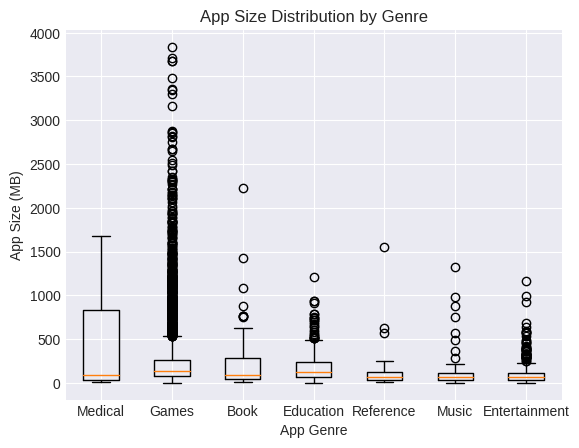

In [448]:
#Select application types with an average size of over 100M and draw a boxplot in descending order of average application size
genres = ['Medical', 'Games', 'Book', 'Education', 'Reference', 'Music', 'Entertainment']
data = [app[app['prime_genre'] == genre]['size_mb'] for genre in genres]

plt.boxplot(data, labels=genres)
plt.xlabel('App Genre')
plt.ylabel('App Size (MB)')
plt.title('App Size Distribution by Genre')
plt.show()

#### (3) App Price Distribution
The dataset contains information on 3383 free apps and 2885 paid apps. As for the paid apps, majority have lower price points, with USD2.99, USD0.99, and USD1.99 being the most common. As prices increase, the number of apps decreases gradually, indicating that users prefer lower-priced apps. Higher-priced apps are less common, suggesting users are more cautious with premium prices.

In [463]:
app['paid'].value_counts()

free    3383
paid    2885
Name: paid, dtype: int64

In [462]:
labels = ['Free Apps', 'Paid Apps']
values = [3383, 2885]

fig4 = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3)])
fig4.update_layout(title_text='Distribution of Paid and Free Apps',width=800,height=400)
fig4.show()

In [451]:
app['price'].describe()

count    6268.000000
mean        1.821977
std         6.128238
min         0.000000
25%         0.000000
50%         0.000000
75%         2.990000
max       299.990000
Name: price, dtype: float64

In [464]:
# Filter data for paid apps
paid_apps = app[app['paid'] == 'paid']['price'].value_counts().reset_index()
paid_apps = paid_apps.sort_values(by='index')
paid_apps = paid_apps.rename(columns={'index': 'Price', 'price': 'Count'})

In [465]:
fig5 = go.Figure(data=[go.Bar(x=paid_apps['Price'].astype(str), y=paid_apps['Count'], text=paid_apps['Count'], textposition='outside')])
fig5.update_layout(title='App Genres Distribution - Bar Chart', xaxis_title='Price', yaxis_title='Count', width=1000, height=600)
fig5.show()

In [454]:
# 数据分组
bins = [0,2,10,300]
labels = ['<2','<10','<300']
app['price_new'] = pd.cut(app['price'],bins,right=False,labels=labels)

In [455]:
app.groupby(['price_new'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_new,,,,,,,,
<2,4601.0,0.389659,0.698513,0.00,0.00,0.00,0.99,1.99
<10,1588.0,4.545416,1.853508,2.99,2.99,3.99,4.99,9.99
<300,79.0,30.496329,42.590740,11.99,14.99,19.99,26.49,299.99


The average prices of different app genres vary significantly. <br>
The "Medical" genre has the highest average price of approximately USD10.09.Followed by "Business" and "Navigation" genres with average prices of USD 5.35 and USD 5.06, respectively.

In [456]:
#不同类别APP的价格分布
app.groupby(['prime_genre'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,65.0,2.732308,3.951238,0.0,0.0000,1.99,3.99,27.99
Business,53.0,5.351887,10.574153,0.0,0.0000,2.99,4.99,59.99
Catalogs,5.0,1.598000,3.573237,0.0,0.0000,0.00,0.00,7.99
Education,387.0,4.132584,20.222512,0.0,0.0000,2.99,2.99,299.99
Entertainment,471.0,0.940828,1.471148,0.0,0.0000,0.00,1.99,9.99
Finance,71.0,0.476620,1.166146,0.0,0.0000,0.00,0.00,5.99
Food & Drink,52.0,1.765962,4.325015,0.0,0.0000,0.00,1.99,27.99
Games,3400.0,1.512038,2.473142,0.0,0.0000,0.00,1.99,29.99
Health & Fitness,159.0,1.994088,2.076700,0.0,0.0000,1.99,2.99,9.99


<Axes: xlabel='price', ylabel='prime_genre'>

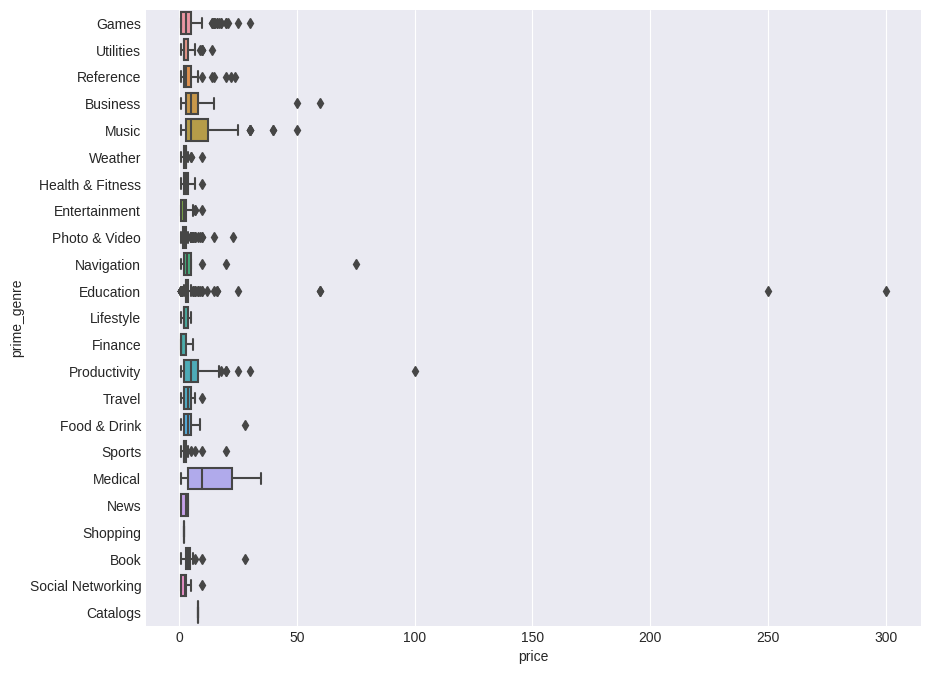

In [466]:
plt.figure(figsize=(10,8))
sns.boxplot(x='price',y='prime_genre',data=app[app['paid']=='paid'])

In [ ]:
#Top 10 Genres with Highest Average Price
price_top10 = app.groupby(['prime_genre'])['price'].mean().sort_values(ascending=False)[:10]
price_top10 = pd.Series(price_top10)

fig6 = go.Figure(data=[go.Bar(
    y=price_top10.index,
    x=price_top10.values,
    orientation='h',
    text=price_top10.apply(lambda x: f'{x:.2f}'),
    textposition='outside')])

# Update layout
fig6.update_layout(
    title='Top 10 Genres with Highest Average Price',
    xaxis_title='Price',
    yaxis_title='Genre',
    width=1000,
    height=600,
    showlegend=False
)

# Show the plot
fig6.show()

Among the top ten genres with the highest prices, the high proportion of paid applications is their common feature. Among them, the "Medical" has the highest selling price but the lowest quantity, while the "Education" has a much smaller proportion of free applications than paid applications.

In [467]:
table = pd.pivot_table(app, values='price', index='prime_genre', columns='paid', aggfunc='count')
table['percent'] = (table['paid'] / (table['free'] + table['paid'])) * 100
sorted_table = table.sort_values(by='percent', ascending=False)
print(sorted_table)

paid               free  paid    percent
prime_genre                             
Medical               5    15  75.000000
Reference            16    37  69.811321
Education           118   269  69.509044
Productivity         58   114  66.279070
Business             18    35  66.037736
Navigation           11    20  64.516129
Book                 25    40  61.538462
Weather              26    40  60.606061
Health & Fitness     65    94  59.119497
Utilities            97   122  55.707763
Photo & Video       153   172  52.923077
Music                66    68  50.746269
Games              1893  1507  44.323529
Lifestyle            68    45  39.823009
Entertainment       284   187  39.702760
Food & Drink         35    17  32.692308
Sports               71    30  29.702970
Travel               50    21  29.577465
News                 46    14  23.333333
Finance              55    16  22.535211
Catalogs              4     1  20.000000
Social Networking   114    20  14.925373
Shopping        

In [468]:
##Sort the data from small to large and extract the index corresponding to the top ten applications with average prices
index1=app.groupby(['prime_genre'])['price'].mean().argsort()[-10:]
index1


table=table.take(index1)
table=table.drop('percent', axis=1)
table

paid,free,paid
prime_genre,,
Food & Drink,35,17
Health & Fitness,65,94
Book,25,40
Reference,16,37
Education,118,269
Productivity,58,114
Music,66,68
Navigation,11,20
Business,18,35


<Axes: xlabel='amount', ylabel='prime_genre'>

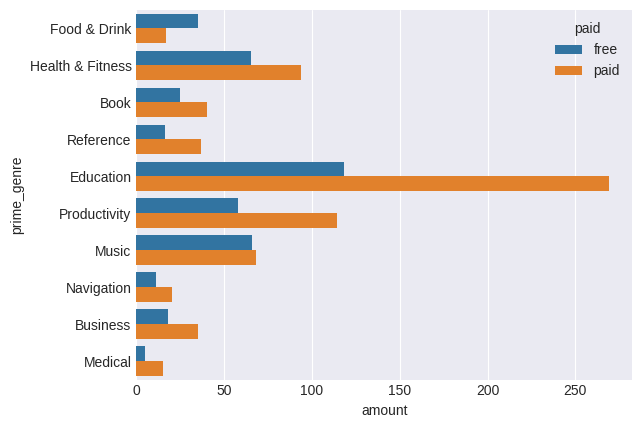

In [469]:
table=table.stack()
table.name='amount'
table=table.reset_index()

sns.barplot(x='amount',y='prime_genre',hue='paid',data=table)

#### (4) App User Rating
The dataset's 'user_rating' column shows a positive average rating of approximately 4.05. Most apps received ratings between 3.5 and 4.5, indicating overall positive feedback. Extreme ratings (1.0 and 5.0) are less common, suggesting users tend to rate apps within the mid-range.

In [470]:
app['user_rating'].describe()

count    6268.000000
mean        4.049697
std         0.726943
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: user_rating, dtype: float64

In [471]:
app_rating=app.groupby(['user_rating']).size()
app_rating

user_rating
1.0      44
1.5      56
2.0     106
2.5     196
3.0     383
3.5     702
4.0    1626
4.5    2663
5.0     492
dtype: int64

In [472]:
fig6 = go.Figure(data=[go.Bar(x=app_rating.index, y=app_rating.values, text=app_rating, textposition='outside')])
fig6.update_layout(title='App Rating Distribution - Bar Chart', xaxis_title='App Rating', yaxis_title='Count', width=900, height=500)
fig6.show()

### 3.2.2 App Genres and User Ratings Trends
The data reveals that Social Networking, Music, and Reference are the most popular genres with high total rating counts, while Medical, Education, and Catalogs have relatively lower engagement. Games, though popular, have a slightly lower total rating count compared to the top genres.

In [473]:
app.groupby(['prime_genre'])['rating_count_tot'].mean().sort_values(ascending=False)

prime_genre
Social Networking    56703.850746
Music                29702.977612
Reference            27062.150943
Weather              24197.484848
Shopping             21425.188679
Navigation           17589.741935
Food & Drink         16887.173077
News                 16268.833333
Finance              16182.478873
Travel               16119.507042
Sports               15832.376238
Games                15552.497353
Photo & Video        15412.141538
Health & Fitness     11222.459119
Book                  8831.523077
Entertainment         8557.363057
Productivity          8332.186047
Lifestyle             7852.159292
Utilities             7772.730594
Business              5149.452830
Catalogs              3465.000000
Education             2621.113695
Medical                681.700000
Name: rating_count_tot, dtype: float64

The average score for all types of apps is not significantly different, is around 3.3-4.3.The highest score is 4.27 in the "Book", and the lowest score is 3.37 in the "Sports".



In [474]:
app_rating_all = app.groupby(['prime_genre'])['user_rating'].mean().sort_values(ascending=False)
app_rating_all

prime_genre
Book                 4.269231
Catalogs             4.200000
Health & Fitness     4.188679
Games                4.185735
Reference            4.169811
Productivity         4.145349
Music                4.097015
Photo & Video        4.081538
Shopping             4.075472
Business             4.028302
Navigation           3.983871
Education            3.952196
Weather              3.924242
Medical              3.875000
Food & Drink         3.855769
Travel               3.852113
News                 3.725000
Social Networking    3.720149
Utilities            3.712329
Entertainment        3.687898
Lifestyle            3.575221
Finance              3.563380
Sports               3.366337
Name: user_rating, dtype: float64

The average user rating for all apps is approximately 3.92. Free apps have ratings that are close to the overall average. On the other hand, paid apps have slightly higher ratings, indicating better performance in terms of user ratings. The small standard deviations of user ratings suggest that users' opinions about the apps are generally consistent.

In [478]:
app_rating_paid=app[app['paid']=='paid'].groupby(['prime_genre'])['user_rating'].mean().sort_values(ascending=False)

In [479]:
app_rating_free=app[app['paid']=='free'].groupby(['prime_genre'])['user_rating'].mean().sort_values(ascending=False)

In [480]:
combined_data = pd.concat([app_rating_all, app_rating_paid, app_rating_free], axis=1)
combined_data.columns = ['All Apps', 'Paid Apps', 'Free Apps']

combined_data.describe()

,All Apps,Paid Apps,Free Apps
count,23.000000,23.000000,23.000000
mean,3.923245,4.003853,3.925138
std,0.242421,0.283915,0.304259
min,3.366337,3.500000,3.246479
25%,3.722575,3.807888,3.743672
50%,3.952196,4.035714,3.898305
75%,4.121182,4.174057,4.132761
max,4.269231,4.500000,4.600000


Analyzing low rating apps, there are 21 genres of apps with ratings less than 3.0. The "Games" has the highest number of low scoring applications (98), followed closely by the Entertainment category (70). The number of low scoring applications in other categories is relatively small, but there is still a need for attention and improvement. This data provides important references for developers and related personnel, helping them focus on improving low scoring applications, increasing user satisfaction, and improving application quality and user experience.

In [496]:
#Analyze reasons for apps with low ratings
low_rating=app[app['user_rating']<3.0]
low_rating.count()

id                  402
track_name          402
size_bytes          402
price               402
rating_count_tot    402
user_rating         402
prime_genre         402
sup_devices         402
ipadSc_urls         402
lang                402
size_mb             402
paid                402
size_group          402
price_new           402
rating_level        402
dtype: int64

In [482]:
low_rating=low_rating.groupby('prime_genre').size().sort_values(ascending=False)
low_rating

prime_genre
Games                98
Entertainment        70
Utilities            33
Lifestyle            27
Sports               27
Education            27
Photo & Video        27
Finance              15
Social Networking    14
Health & Fitness     10
Travel                9
Productivity          7
Business              6
Food & Drink          6
News                  5
Shopping              5
Book                  4
Music                 4
Medical               3
Weather               3
Reference             2
dtype: int64

In [483]:
fig4 = go.Figure(data=[go.Bar(x=low_rating.index, y=low_rating.values)])
fig4.update_layout(title_text='Average User Ratings for Each Genre',width=800,height=400)
fig4.show()

### 3.2.3 Consistent User Rating Levels for Paid and Free Apps
In rating levels [4, 5], both paid and free apps have a significant number of apps, and the counts are relatively similar. This might suggest that apps in these rating ranges receive more consistent user feedback regardless of being paid or free.

In [484]:
app2= app[app['price']<49.99]

<Axes: xlabel='price', ylabel='user_rating'>

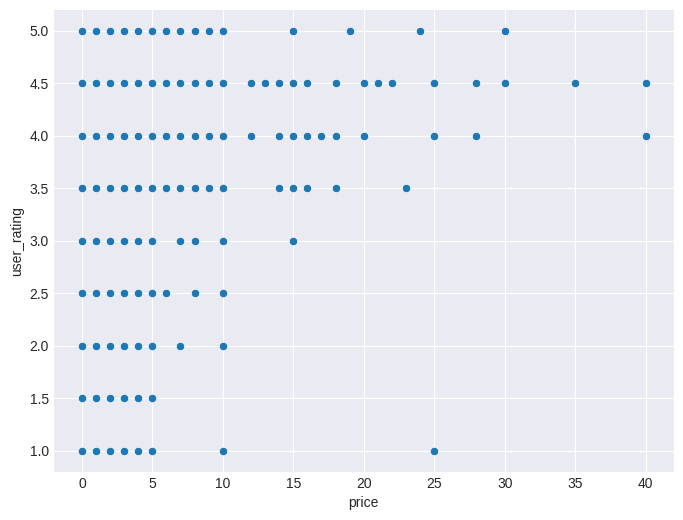

In [485]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='price',y='user_rating',data=app2)

In [486]:
bins = [0,1,2,3,3.5,4,4.5,5,5.5]
app['rating_level']=pd.cut(app.user_rating,bins,right=False)
app.groupby(['rating_level'])['user_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_level,,,,,,,,
"[0.0, 1.0)",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"[1.0, 2.0)",100.0,1.280000,0.249444,1.0,1.0,1.5,1.5,1.5
"[2.0, 3.0)",302.0,2.324503,0.239037,2.0,2.0,2.5,2.5,2.5
"[3.0, 3.5)",383.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0
"[3.5, 4.0)",702.0,3.500000,0.000000,3.5,3.5,3.5,3.5,3.5
"[4.0, 4.5)",1626.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0
"[4.5, 5.0)",2663.0,4.500000,0.000000,4.5,4.5,4.5,4.5,4.5
"[5.0, 5.5)",492.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


In [494]:
bins = [0, 1, 2, 3, 3.5, 4, 4.5, 5, 5.5]
app['rating_level'] = pd.cut(app.user_rating, bins, right=False)
app3 = app[app['paid'] == 'paid'].groupby(['rating_level'])['user_rating'].size()
app3

rating_level
[0.0, 1.0)       0
[1.0, 2.0)      53
[2.0, 3.0)     126
[3.0, 3.5)     167
[3.5, 4.0)     328
[4.0, 4.5)     776
[4.5, 5.0)    1198
[5.0, 5.5)     237
Name: user_rating, dtype: int64

In [495]:
app4 = app[app['paid'] == 'free'].groupby(['rating_level'])['user_rating'].size()
app4

rating_level
[0.0, 1.0)       0
[1.0, 2.0)      47
[2.0, 3.0)     176
[3.0, 3.5)     216
[3.5, 4.0)     374
[4.0, 4.5)     850
[4.5, 5.0)    1465
[5.0, 5.5)     255
Name: user_rating, dtype: int64

<Axes: xlabel='rating_level', ylabel='count'>

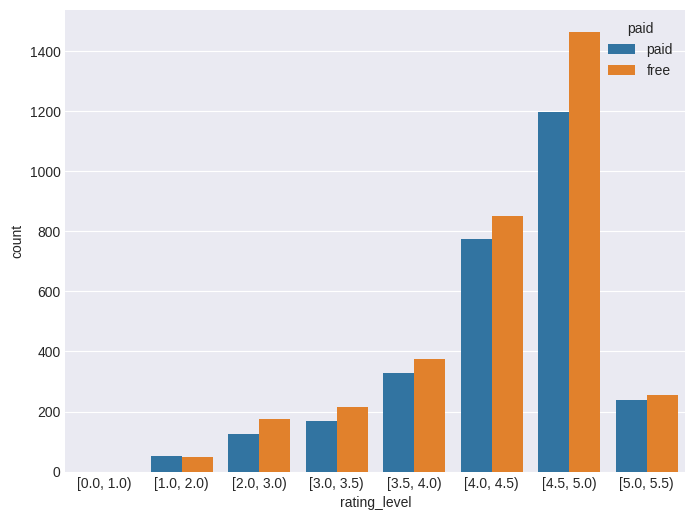

In [488]:
plt.figure(figsize=(8,6))
sns.countplot(x='rating_level',hue='paid',data=app)

### 3.2.4  Correlation Patterns among User Rating, App Size, and Price
The correlation analysis conducted on the app dataset indicates weak and negligible linear associations among the variables 'user_rating', 'size_mb', and 'price'. The correlation coefficient values suggest that user ratings have a minimal positive correlation with app size (0.066) and price (0.047). Similarly, weak positive relationship between app size and price, with a correlation coefficient of 0.182.

In [497]:
rel_mb_rate=['user_rating','size_mb','price']
rel1=app[rel_mb_rate].corr()
print(rel1)

             user_rating   size_mb     price
user_rating     1.000000  0.057402  0.019287
size_mb         0.057402  1.000000  0.164910
price           0.019287  0.164910  1.000000


<Axes: >

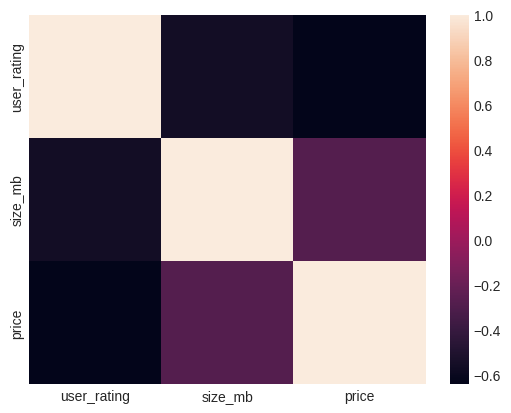

In [498]:
import seaborn as sns
sns.heatmap(rel1.corr())

### 3.2.5 Binary Logistic Regression Model

The model has a high accuracy (Accuracy of 0.76) and performs well in predicting high-rated apps, with high precision and recall. However, it performs poorly in predicting low-rated apps and requires further optimization to improve its performance. It is recommended to consider incorporating more features and improving data preprocessing methods to enhance overall prediction accuracy and generalization ability.

In [499]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [502]:
app['user_rating_genre'] = app['user_rating'].apply(lambda x: 'high_rated' if x >= 4.0 else 'low_rated')
X = app[['size_mb', 'price', 'rating_count_tot', 'sup_devices', 'ipadSc_urls', 'lang']]
y = app['user_rating_genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7615629984051037
              precision    recall  f1-score   support

  high_rated       0.76      1.00      0.86       955
   low_rated       0.00      0.00      0.00       299

    accuracy                           0.76      1254
   macro avg       0.38      0.50      0.43      1254
weighted avg       0.58      0.76      0.66      1254



## IV. Conclusion

The key findings are as follows:

1. App Genre: "Games" dominate the Apple Store, followed by "Entertainment," "Education," "Photo & Video," and "Utilities." "Social Networking," "Music," and "Reference" have high total rating counts, while "Medical," "Education," and "Catalogs" have lower engagement. "Games" have a slightly lower total rating count compared to the top genres.

2. App Size Distribution: Most apps have a size of 200MB or less, with outliers in certain genres. "Medical" has the highest average size, while most other genres fall within the typical size range.

3. App Price Distribution: Majority of apps are free, with lower price points for paid apps. "Medical" has the highest average price, and the proportion of paid apps varies among genres.

4. App User Rating: Average rating is around 4.05, with most ratings between 3.5 and 4.5. Both paid and free apps receive significant ratings in high rating levels [4, 5].

5. Correlation Analysis: The correlation analysis highlighted the relationship between user ratings, app size, and price. We found weak correlations among these variables, suggesting that user ratings are not significantly influenced by app size or price.

6. Binary Logistic Regression Model: The logistic regression model performs well in predicting high-rated apps but has room for improvement in predicting low-rated apps.

Overall, this data analysis provides valuable information to understand the trends and patterns in the app market and make data-driven decisions for app development and marketing strategies. Further optimization is needed to improve accuracy in predicting low-rated apps.